# Data loading and Preprocessing 

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data loading 

In [2]:
val=pd.read_csv('CANCER.txt')

### Removing rows with '?' in them 

In [3]:
val = val[val.g != '?']

In [4]:
X = val[[ 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']]
y = val['output']
X['g'] = pd.to_numeric(X['g'])

C:\Users\Saurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


 # KMeans Algorithm for different values of K

In [5]:
n=10
size = len(X.index)
iterations = 10

### Function for calcuating distance

In [6]:
def euc_distance(a, b):
    temp = (a - b)**2
    distance = np.sum(temp)
    return(distance**0.5)

### Function for calculating means

In [7]:
def get_means(cluster, X):
    mean = np.zeros(len(X.columns))
    #print(mean)
    for item in cluster:
        mean = mean + X.iloc[item]
    
    if len(cluster)!=0:
        mean = mean/len(cluster)
    else:
        mean = np.asarray([1000]*len(X.columns))
    #print(mean)
    return(mean)

### Iterations for different values of K

In [8]:
print("#################  K-Means ##############")
saved_means = []
saved_clusters = []
sum_sq_dis=[]
for K in range(1, n+1):
    initial_index=np.random.choice(size, K)
    #print(initial_index)
    
    means = []
    for i in range(K):
        means.append(X.iloc[initial_index[i]])
        
    for it in range(iterations):
        cluster=[]
        for i in range(K):
            cluster.append([])
            
        for i in range(size):
            distance = 1000000000 
            index = 0
            for j in range(K):
                temp = euc_distance(X.iloc[i], means[j])
                if temp<distance:
                    distance = temp
                    index = j
            cluster[index].append(i)

        means=[]
        for i in range(K):
            means.append(get_means(cluster[i], X))
    saved_means.append(means)
    saved_clusters.append(cluster)
        
    print('\nMeans for K =', K, 'are : ')
    print(np.asarray(means))
    #print(cluster)

#print(sum_sq_dis)

#################  K-Means ##############

Means for K = 1 are : 
[[4.44216691 3.15080527 3.21522694 2.83016105 3.23426061 3.54465593
  3.44509517 2.86969253 1.60322108]]

Means for K = 2 are : 
[[7.17391304 6.8        6.73478261 5.73913043 5.47826087 7.93043478
  6.10869565 6.03913043 2.56956522]
 [3.05518764 1.29801325 1.42825607 1.35320088 2.09492274 1.31788079
  2.09271523 1.26048565 1.11258278]]

Means for K = 3 are : 
[[7.2081448  6.93665158 6.85972851 5.88687783 5.49773756 8.03167421
  6.18099548 6.11764706 2.6199095 ]
 [1.77692308 1.11538462 1.17692308 1.15       1.97307692 1.23076923
  1.99615385 1.06538462 1.07692308]
 [4.84653465 1.62871287 1.85148515 1.64851485 2.38118812 1.61386139
  2.31683168 1.63861386 1.16831683]]

Means for K = 4 are : 
[[1.25274725 1.12637363 1.2032967  1.14285714 1.98351648 1.24175824
  2.00549451 1.06593407 1.1043956 ]
 [7.125      4.75       5.         4.61538462 4.05769231 8.64423077
  4.99038462 4.04807692 1.65384615]
 [7.19379845 8.35658915 8.0

### Elbow Method

In [9]:
def elbow_method(means, cluster, X, K):
    sum1 = 0.0
    for i in range(K):
        for item in cluster[i]:
            temp = (means[i] - X.iloc[item])**2
            sum1 += np.sum(temp)
    #print(sum1)
    return(sum1)
    

In [10]:
for i in range(n):
    sum_sq_dis.append(elbow_method(saved_means[i], saved_clusters[i], X, i+1))

Text(0.5, 1.0, 'Elbow Plot')

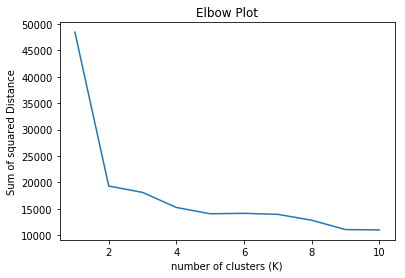

In [11]:
plt.figure()
plt.plot(range(1, n+1), sum_sq_dis)
plt.xlabel('number of clusters (K)')
plt.ylabel('Sum of squared Distance')
plt.title('Elbow Plot')

## Clearly from the plot it can be seen that K=2 gives the best cluster according to Elbow method

### Silhouette Score

In [12]:
print("############## Shilloute Score ###############")
saved_s=[]
for t in range(1, n):
    s_avg = 0
    left = 0
    for i in range(t+1):
        if len(saved_clusters[t][i]) ==0:
            left=left+1
            continue
        min1 = 100000000
        cluster_index = -1
        for j in range(t+1):
            if i!=j:
                dist = euc_distance(saved_means[t][i], saved_means[t][j])
                if dist< min1:
                    min1 = dist
                    cluster_index = j
                    
        sum1 = 0.0
        for item in saved_clusters[t][i]:
            sum1 += euc_distance(saved_means[t][i], X.iloc[item])
        a = sum1/len(saved_clusters[t][i]) 
        
        sum1 = 0.0
        j= cluster_index
        for item in saved_clusters[t][j]:
            sum1 += euc_distance(saved_means[t][i], X.iloc[item])
        b = sum1/len(saved_clusters[t][j])
        
        s = (b - a)/max(a, b)   
        s_avg = s_avg + s
    s_avg = s_avg/(t+1-left) 
    saved_s.append(s_avg)
    print("For no of clusters =", t+1, " The average silhouette_score is :", s_avg) 

############## Shilloute Score ###############
For no of clusters = 2  The average silhouette_score is : 0.6381806308198421
For no of clusters = 3  The average silhouette_score is : 0.40151424562324856
For no of clusters = 4  The average silhouette_score is : 0.37832789525749877
For no of clusters = 5  The average silhouette_score is : 0.36434969264731987
For no of clusters = 6  The average silhouette_score is : 0.25027038458286377
For no of clusters = 7  The average silhouette_score is : 0.31336192511316274
For no of clusters = 8  The average silhouette_score is : 0.2520195584288289
For no of clusters = 9  The average silhouette_score is : 0.33316654303508986
For no of clusters = 10  The average silhouette_score is : 0.3269499948482584


Text(0.5, 1.0, 'Silhouette Plot')

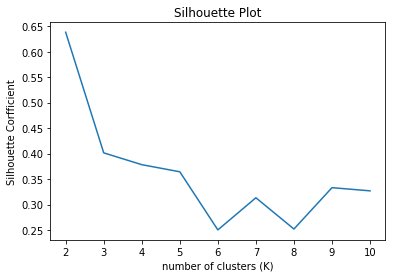

In [13]:
plt.figure()
plt.plot( range(2, n+1), saved_s)
plt.xlabel('number of clusters (K)')
plt.ylabel('Silhouette Corfficient')
plt.title('Silhouette Plot')

## Clearly from the plot it can be seen that K=2 gives the best cluster according to Silhouette Score